## Teoria - Redução de Dimensionalidade

Motivação: Apresentar os dados no espaço 3D, 2D ou 1D

Eigendecomposition:

Multiplicação de matrizes A.

Problema: $A^p$

* p = 8: 

$$A \cdot A \cdot A\cdot A\cdot A\cdot A\cdot A\cdot A $$
$$ A² \cdot A² \cdot A² \cdot A²$$
$$ A^4 \cdot A⁴ $$

A matriz A pode ser escrita como a multiplicação da matriz de autovetores e matriz de autovalores.

$$A = U \Lambda U^{-1}$$

* p = 8:

$$(U \Lambda U^{-1}) \cdot (U \Lambda U^{-1}) \cdot (U \Lambda U^{-1}) \cdot (U \Lambda U^{-1}) \cdot (U \Lambda U^{-1}) \cdot$$
$$(U \Lambda U^{-1}) \cdot (U \Lambda U^{-1}) \cdot (U \Lambda U^{-1})$$

como $U \cdot U^{-1} = I$

$$U \cdot A^p \cdot U^{-1}$$


PCA

Variância: 
$$\sigma² = \frac{\sum{x_i - \mu}²}{n}$$

Covariância:
$$cov_{xy} = \frac{\sum{(x_i - \mu_x) \cdot (y_i - \mu_y)}}{n}$$

Matriz de Covariância:
$$
\begin{pmatrix}cov\left(x,x\right)&cov\left(y,x\right)&cov\left(z,x\right)\\ cov\left(x,y\right)&cov\left(y,y\right)&cov\left(z,y\right)\\ cov\left(x,z\right)&cov\left(y,z\right)&cov\left(z,z\right)\end{pmatrix}$$

Na matriz de covariância, os autovetores representam as direções de maior variância.

Com PCA, troca-se os eixos para um dos eixos corresponder a direção de alta variância, enquanto os outros representam pouca variância

$$
A = \begin{pmatrix}x_1&y_1&z_1&w_1\\ x_2&y_2&z_2&w_2\\ ...&...&...&...\\ x_n&y_n&z_n&w_n\\\end{pmatrix}$$ 

sendo A a matriz de features em escala [-1,1].
Como a escala está entre -1 e 1, então a média será 0 e a covariância se reduzirá a $x_i \cdot y_i$.

$$
A = \begin{pmatrix}x_1&y_1&z_1&w_1\\ x_2&y_2&z_2&w_2\\ ...&...&...&...\\ x_n&y_n&z_n&w_n\\\end{pmatrix} \cdot \begin{pmatrix}x_1&x_2&...&x_n\\ y_1&y_2&...&y_n\\ z_1&z_2&...&z_n\\ w_1&w_2&...&w_n\\\end{pmatrix}$$ 

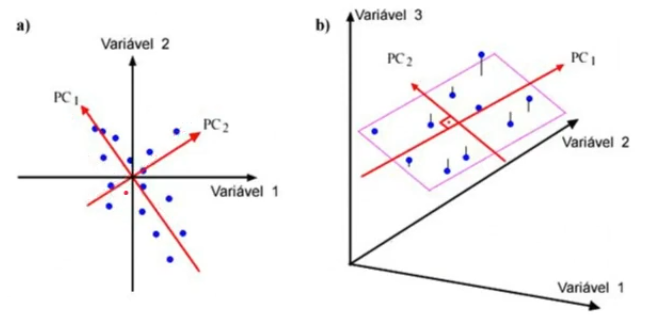

Outras técnicas de RD:

t-SNE e UMAP

## Exemplo - Implementação PCA

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
x1, x2 = make_regression(n_samples= 150, n_features= 1, noise= 5.0)

In [3]:
x = np.c_[x1, x2]

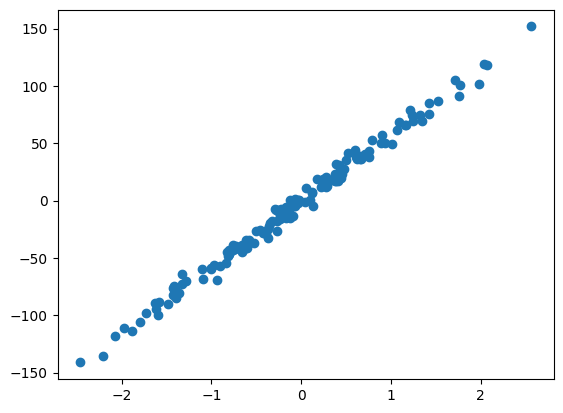

In [4]:
plt.scatter(x1,x2)

In [5]:
scaler = MinMaxScaler(feature_range= (-1,1))
scaler.fit(x)
more_x = scaler.transform(x)

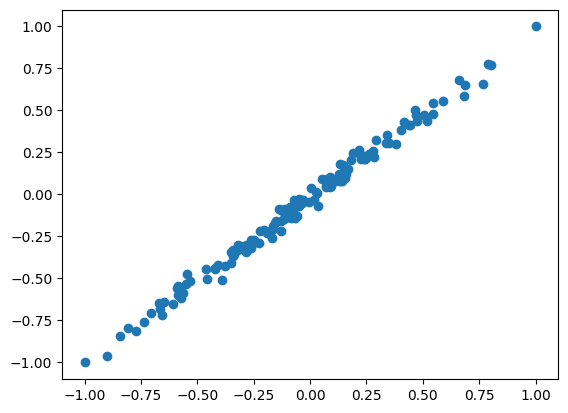

In [6]:
plt.scatter(more_x[:,0], more_x[:,1])

In [8]:
cov = np.transpose(more_x)@more_x

#@ servirá para multiplicar matrizes

In [9]:
u, v = np.linalg.eig(cov)

In [10]:
v1 = v[:, 0]
print(v1)
v2 = v[:,1]
print(v2)

[-0.70716723  0.70704633]
[-0.70704633 -0.70716723]


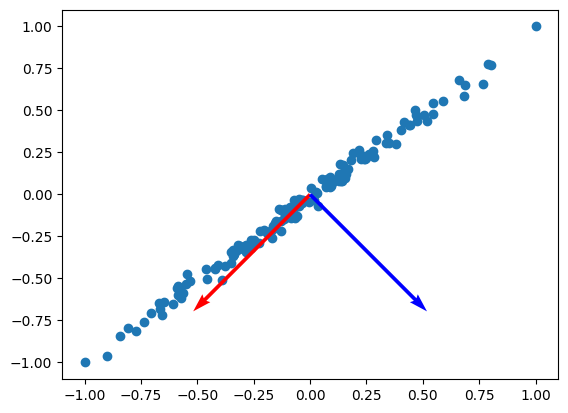

In [13]:
V = np.array([v1,v2])
origin = np.array([[0,0],[0,0]])

plt.scatter(more_x[:,0], more_x[:,1])
plt.quiver(*origin, v[:,0], v[:,1], color=['r','b'], scale= 3)
plt.show()

In [14]:
from sklearn import datasets
import pandas as pd

In [15]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [17]:
df =pd.DataFrame(np.c_[x,y], columns= iris.feature_names + ['target'])
df['target']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64

In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [19]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(x)
more_x = scaler.transform(x)

In [20]:
pca = PCA(n_components= 2)
pca.fit(more_x)
x_pca = pca.transform(more_x)

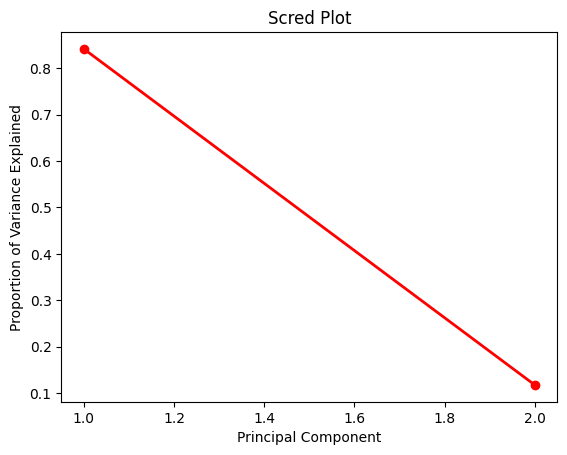

In [24]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth= 2)
plt.title('Scred Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

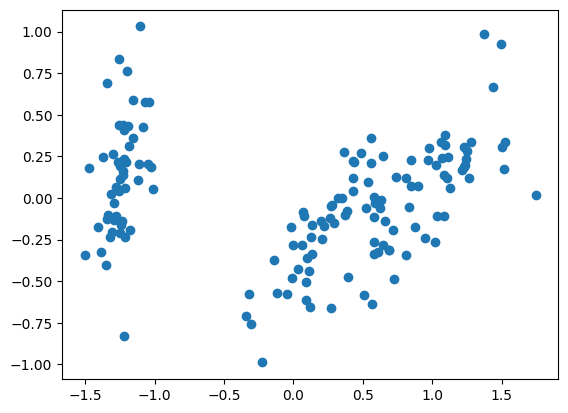

In [25]:
plt.scatter(x_pca[:,0], x_pca[:,1])

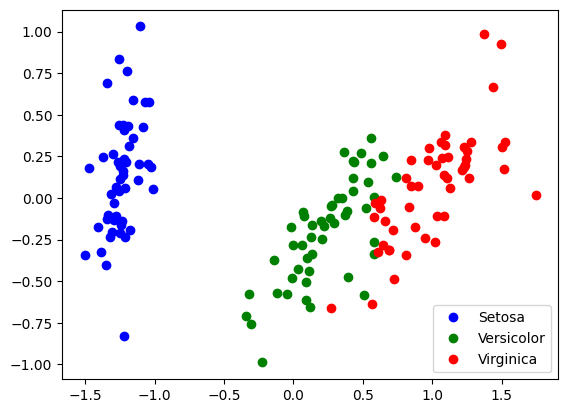

In [28]:
plt.plot(x_pca[y == 0, 0], x_pca[y == 0, 1], 'bo', label= 'Setosa')
plt.plot(x_pca[y == 1, 0], x_pca[y == 1, 1], 'go', label= 'Versicolor')
plt.plot(x_pca[y == 2, 0], x_pca[y == 2, 1], 'ro', label= 'Virginica')
plt.legend(loc= 0)

In [29]:
model = DBSCAN(eps= 0.152)
labels = model.fit_predict(x_pca)

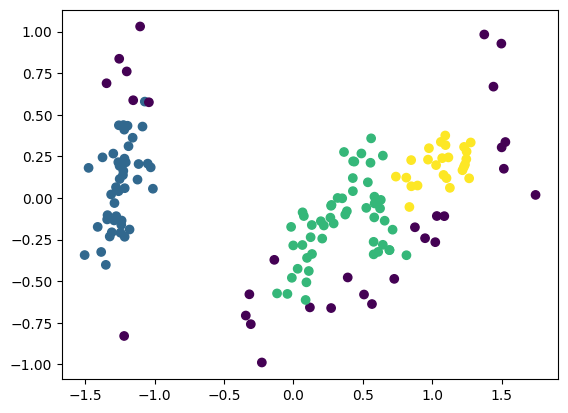

In [30]:
plt.scatter(x_pca[:,0], x_pca[:,1], c = labels)
plt.show(True)